In [1]:
import matplotlib.pyplot as plt
import numpy as np

import time

import os

os.environ['CUDA_VISIBLE_DEVICES']="0"

from keras.layers import Dense, Input
from keras.models import Model

import omnifold as of
import os
import tensorflow as tf


In [2]:
print("\n\n")
print("  numpy version:  %s" % str(np.version.version) )
print("  tensorflow version:  %s" % str(tf.__version__))
print("\n\n")




  numpy version:  1.21.5
  tensorflow version:  2.11.0





## Set model and resolution parameters

In [3]:
train_mu0 = 0.
train_mu1 = 1.
train_rho01 = -0.6

train_sig0 = 1.0
train_sig1 = 1.5

train_cov00 = train_sig0 * train_sig0 
train_cov11 = train_sig1 * train_sig1
train_cov01 = train_rho01 * train_sig0 * train_sig1

train_cov = np.array( [[train_cov00, train_cov01], [train_cov01, train_cov11]] )
train_mu = np.array( [train_mu0, train_mu1])



true_mu0 = 0.2
true_mu1 = 0.8
true_rho01 = -0.6

true_sig0 = 0.9
true_sig1 = 1.3

true_cov00 = true_sig0 * true_sig0 
true_cov11 = true_sig1 * true_sig1
true_cov01 = true_rho01 * true_sig0 * true_sig1

true_cov = np.array( [[true_cov00, true_cov01], [true_cov01, true_cov11]] )
true_mu = np.array( [true_mu0, true_mu1])



#--- resolution is in same dimensions as features (not sigma/val)
res0 = 0.5
res1 = 0.8




## Plots to visualize these parameter choices

In [4]:

ngen_train = 100000
ngen_true = 10000

train_pts = np.random.multivariate_normal(train_mu, train_cov, size=ngen_train)
true_pts = np.random.multivariate_normal(true_mu, true_cov, size=ngen_true)

train_det_pts = np.random.normal( train_pts, [res0, res1])

true_det_pts = np.random.normal( true_pts, [res0, res1])



<function matplotlib.pyplot.show(close=None, block=None)>

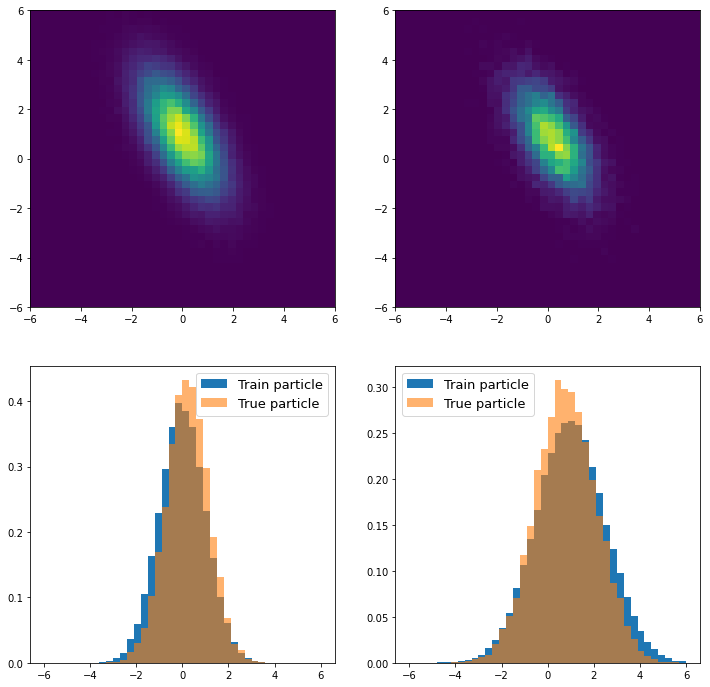

In [5]:
fig,ax = plt.subplots( 2, 2, figsize=(12,12))

hmin=-6
hmax=6
hbins=40

ax[0][0].hist2d( train_pts[:,0], train_pts[:,1], bins=[hbins,hbins], range=([hmin,hmax],[hmin,hmax]))

ax[0][1].hist2d( true_pts[:,0], true_pts[:,1], bins=[hbins,hbins], range=([hmin,hmax],[hmin,hmax]))

ax[1][0].hist( train_pts[:,0], bins=hbins, range=[hmin,hmax], density=True, label='Train particle' )
ax[1][0].hist( true_pts[:,0], bins=hbins, range=[hmin,hmax], density=True, label='True particle', alpha=0.6)

ax[1][1].hist( train_pts[:,1], bins=hbins, range=[hmin,hmax], density=True, label='Train particle' )
ax[1][1].hist( true_pts[:,1], bins=hbins, range=[hmin,hmax], density=True, label='True particle', alpha=0.6)


ax[1][0].legend(loc='best', fontsize=13)
ax[1][1].legend(loc='best', fontsize=13)

plt.show

In [6]:
train_diff = train_det_pts - train_pts

In [7]:
diff_cov = np.cov( train_diff.T )

In [8]:
diff_cov

array([[ 2.48913605e-01, -6.33195992e-04],
       [-6.33195992e-04,  6.37817825e-01]])

In [9]:
np.sqrt(diff_cov[0,0])

0.49891242212503456

In [10]:
np.sqrt(diff_cov[1,1])

0.7986349763072751

<function matplotlib.pyplot.show(close=None, block=None)>

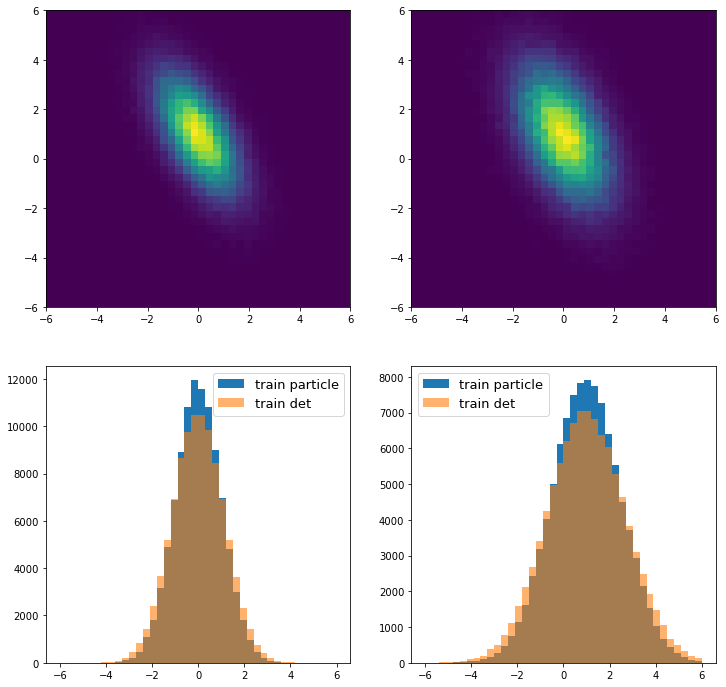

In [11]:
fig,ax = plt.subplots( 2, 2, figsize=(12,12))

hmin=-6
hmax=6
hbins=40

ax[0][0].hist2d( train_pts[:,0], train_pts[:,1], bins=[hbins,hbins], range=([hmin,hmax],[hmin,hmax]))

ax[0][1].hist2d( train_det_pts[:,0], train_det_pts[:,1], bins=[hbins,hbins], range=([hmin,hmax],[hmin,hmax]))

ax[1][0].hist( train_pts[:,0], bins=hbins, range=[hmin,hmax], label='train particle' )
ax[1][0].hist( train_det_pts[:,0], bins=hbins, range=[hmin,hmax], label='train det', alpha=0.6)

ax[1][1].hist( train_pts[:,1], bins=hbins, range=[hmin,hmax], label='train particle' )
ax[1][1].hist( train_det_pts[:,1], bins=hbins, range=[hmin,hmax], label='train det', alpha=0.6)


ax[1][0].legend(loc='best', fontsize=13)
ax[1][1].legend(loc='best', fontsize=13)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

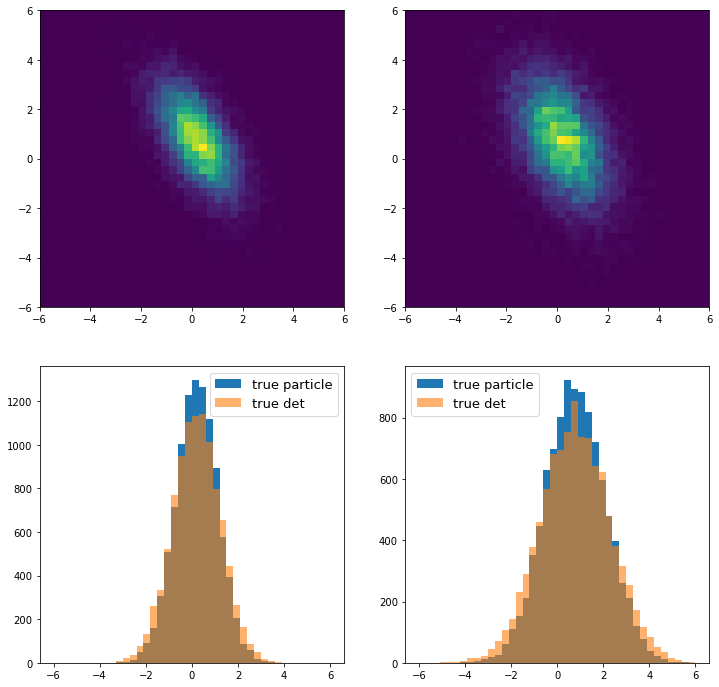

In [12]:
fig,ax = plt.subplots( 2, 2, figsize=(12,12))

hmin=-6
hmax=6
hbins=40

ax[0][0].hist2d( true_pts[:,0], true_pts[:,1], bins=[hbins,hbins], range=([hmin,hmax],[hmin,hmax]))

ax[0][1].hist2d( true_det_pts[:,0], true_det_pts[:,1], bins=[hbins,hbins], range=([hmin,hmax],[hmin,hmax]))

ax[1][0].hist( true_pts[:,0], bins=hbins, range=[hmin,hmax], label='true particle' )
ax[1][0].hist( true_det_pts[:,0], bins=hbins, range=[hmin,hmax], label='true det', alpha=0.6)

ax[1][1].hist( true_pts[:,1], bins=hbins, range=[hmin,hmax], label='true particle' )
ax[1][1].hist( true_det_pts[:,1], bins=hbins, range=[hmin,hmax], label='true det', alpha=0.6)


ax[1][0].legend(loc='best', fontsize=13)
ax[1][1].legend(loc='best', fontsize=13)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

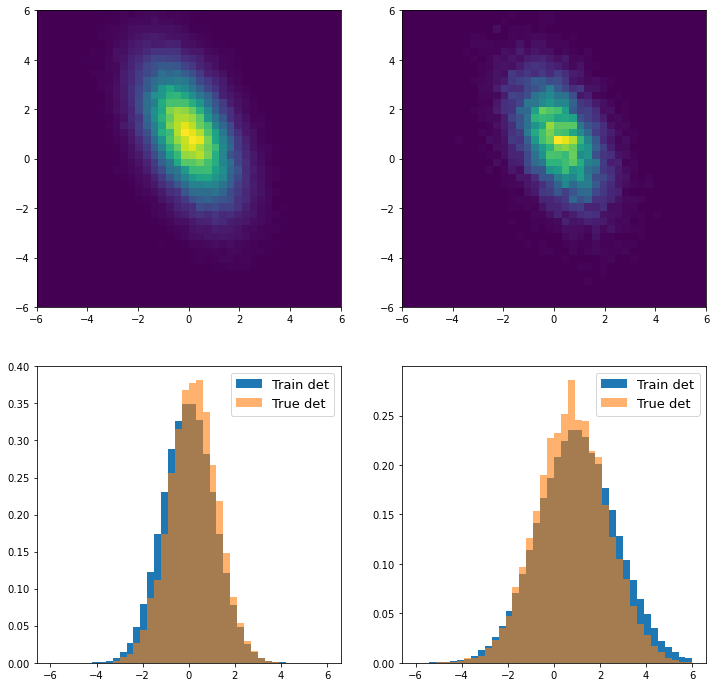

In [13]:
fig,ax = plt.subplots( 2, 2, figsize=(12,12))

hmin=-6
hmax=6
hbins=40

ax[0][0].hist2d( train_det_pts[:,0], train_det_pts[:,1], bins=[hbins,hbins], range=([hmin,hmax],[hmin,hmax]))

ax[0][1].hist2d( true_det_pts[:,0], true_det_pts[:,1], bins=[hbins,hbins], range=([hmin,hmax],[hmin,hmax]))

ax[1][0].hist( train_det_pts[:,0], bins=hbins, density=True, range=[hmin,hmax], label='Train det' )
ax[1][0].hist( true_det_pts[:,0], bins=hbins, density=True, range=[hmin,hmax], label='True det', alpha=0.6)

ax[1][1].hist( train_det_pts[:,1], bins=hbins, density=True, range=[hmin,hmax], label='Train det' )
ax[1][1].hist( true_det_pts[:,1], bins=hbins, density=True, range=[hmin,hmax], label='True det', alpha=0.6)


ax[1][0].legend(loc='best', fontsize=13)
ax[1][1].legend(loc='best', fontsize=13)

plt.show

## Set up NN model for OmniFold

In [14]:
inputs = Input((2, ))
hidden_layer_1 = Dense(50, activation='relu')(inputs)
hidden_layer_2 = Dense(50, activation='relu')(hidden_layer_1)
hidden_layer_3 = Dense(50, activation='relu')(hidden_layer_2)
outputs = Dense(1, activation='sigmoid')(hidden_layer_3)
model = Model(inputs=inputs, outputs=outputs)

2023-10-27 14:48:45.909032: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-27 14:48:45.925413: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-27 14:48:45.925654: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-27 14:48:45.929026: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-27 14:48:45.929212: I tensorflow/compiler/xla/stream_executo

## Package the training data for OmniFold

In [15]:
train_both = np.stack([train_pts, train_det_pts], axis=1)

## Run OmniFold

In [16]:
%%time


verbose = True

of_niter = 4

of_weights = of.omnifold( train_both, true_det_pts, of_niter, model, verbose)




  shape of theta0_S : (100000, 2)
  shape of theta_unknown_S : (10000, 2)
  shape of xvals_1 :  (110000, 2)



  shape of labels0 : (100000,)
  shape of labels_unknown : (10000,)
  shape of yvals_1 :  (110000,)



  shape of theta0_G : (100000, 2)
  shape of xvals_2 :  (200000, 2)
  shape of yvals_2 :  (200000,)




ITERATION: 1

   -- ITERATION 1  STEP 1

Epoch 1/20


2023-10-27 14:48:47.649261: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-10-27 14:48:47.652462: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f5f78035af0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-10-27 14:48:47.652493: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2023-10-27 14:48:47.660164: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-10-27 14:48:47.776072: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


9/9 [==============================] - 2s 21ms/step - loss: 0.7203 - accuracy: 0.4964 - val_loss: 0.5589 - val_accuracy: 0.4544
Epoch 2/20
9/9 [==============================] - 0s 5ms/step - loss: 0.4951 - accuracy: 0.4546 - val_loss: 0.4148 - val_accuracy: 0.4544
Epoch 3/20
9/9 [==============================] - 0s 5ms/step - loss: 0.3849 - accuracy: 0.4546 - val_loss: 0.3492 - val_accuracy: 0.4544
Epoch 4/20
9/9 [==============================] - 0s 5ms/step - loss: 0.3443 - accuracy: 0.4546 - val_loss: 0.3339 - val_accuracy: 0.4544
Epoch 5/20
9/9 [==============================] - 0s 5ms/step - loss: 0.3357 - accuracy: 0.4546 - val_loss: 0.3280 - val_accuracy: 0.4544
Epoch 6/20
9/9 [==============================] - 0s 5ms/step - loss: 0.3292 - accuracy: 0.4546 - val_loss: 0.3223 - val_accuracy: 0.4544
Epoch 7/20
9/9 [==============================] - 0s 4ms/step - loss: 0.3238 - accuracy: 0.4546 - val_loss: 0.3189 - val_accuracy: 0.4544
Epoch 8/20
9/9 [============================

9/9 [==============================] - 0s 5ms/step - loss: 0.1238 - accuracy: 0.2477 - val_loss: 0.1245 - val_accuracy: 0.2690
Epoch 19/20
9/9 [==============================] - 0s 5ms/step - loss: 0.1238 - accuracy: 0.2303 - val_loss: 0.1244 - val_accuracy: 0.1945
Epoch 20/20
10/10 [==============================] - 0s 708us/step

   -- ITERATION 2  STEP 2

Epoch 1/20
75/75 [==============================] - 1s 4ms/step - loss: 0.2045 - accuracy: 0.2542 - val_loss: 0.1660 - val_accuracy: 0.2493
Epoch 2/20
75/75 [==============================] - 0s 3ms/step - loss: 0.1652 - accuracy: 0.2502 - val_loss: 0.1657 - val_accuracy: 0.2493
Epoch 3/20
75/75 [==============================] - 0s 3ms/step - loss: 0.1652 - accuracy: 0.2502 - val_loss: 0.1656 - val_accuracy: 0.2493
Epoch 4/20
75/75 [==============================] - 0s 3ms/step - loss: 0.1652 - accuracy: 0.2502 - val_loss: 0.1657 - val_accuracy: 0.2493
Epoch 5/20
75/75 [==============================] - 0s 3ms/step - loss: 0.1652 

75/75 [==============================] - 0s 3ms/step - loss: 0.1669 - accuracy: 0.2501 - val_loss: 0.1671 - val_accuracy: 0.2498
Epoch 15/20
75/75 [==============================] - 0s 3ms/step - loss: 0.1669 - accuracy: 0.2501 - val_loss: 0.1671 - val_accuracy: 0.2498
Epoch 16/20
75/75 [==============================] - 0s 2ms/step - loss: 0.1669 - accuracy: 0.2501 - val_loss: 0.1671 - val_accuracy: 0.2498
Epoch 17/20
75/75 [==============================] - 0s 3ms/step - loss: 0.1669 - accuracy: 0.2501 - val_loss: 0.1671 - val_accuracy: 0.2498
Epoch 18/20
75/75 [==============================] - 0s 2ms/step - loss: 0.1669 - accuracy: 0.2501 - val_loss: 0.1671 - val_accuracy: 0.2498
Epoch 19/20
75/75 [==============================] - 0s 3ms/step - loss: 0.1669 - accuracy: 0.2501 - val_loss: 0.1671 - val_accuracy: 0.2498
Epoch 20/20
10/10 [==============================] - 0s 671us/step

ITERATION: 4

   -- ITERATION 4  STEP 1

Epoch 1/20
9/9 [==============================] - 1s 18ms

In [17]:
of_weights

array([[[0.10902819, 0.11757524, 0.06332868, ..., 0.11000435,
         0.08192091, 0.05391145],
        [0.09357624, 0.09744526, 0.06104366, ..., 0.10382611,
         0.09580334, 0.0417601 ]],

       [[0.91791451, 1.03935421, 1.00898063, ..., 1.06425452,
         0.89578807, 1.02207291],
        [0.09359202, 0.09817334, 0.06309056, ..., 0.10849714,
         0.09687287, 0.04276873]],

       [[0.9363935 , 1.01494837, 0.91086823, ..., 1.044294  ,
         0.89427173, 0.91029155],
        [0.08582603, 0.09082519, 0.06144542, ..., 0.11017838,
         0.0890194 , 0.03972294]],

       [[0.98066676, 0.96945363, 0.906896  , ..., 1.014045  ,
         0.9543997 , 0.90183675],
        [0.0838815 , 0.0902443 , 0.05984435, ..., 0.10898584,
         0.08760024, 0.03598574]]])

In [18]:
np.shape( of_weights)

(4, 2, 100000)

<function matplotlib.pyplot.show(close=None, block=None)>

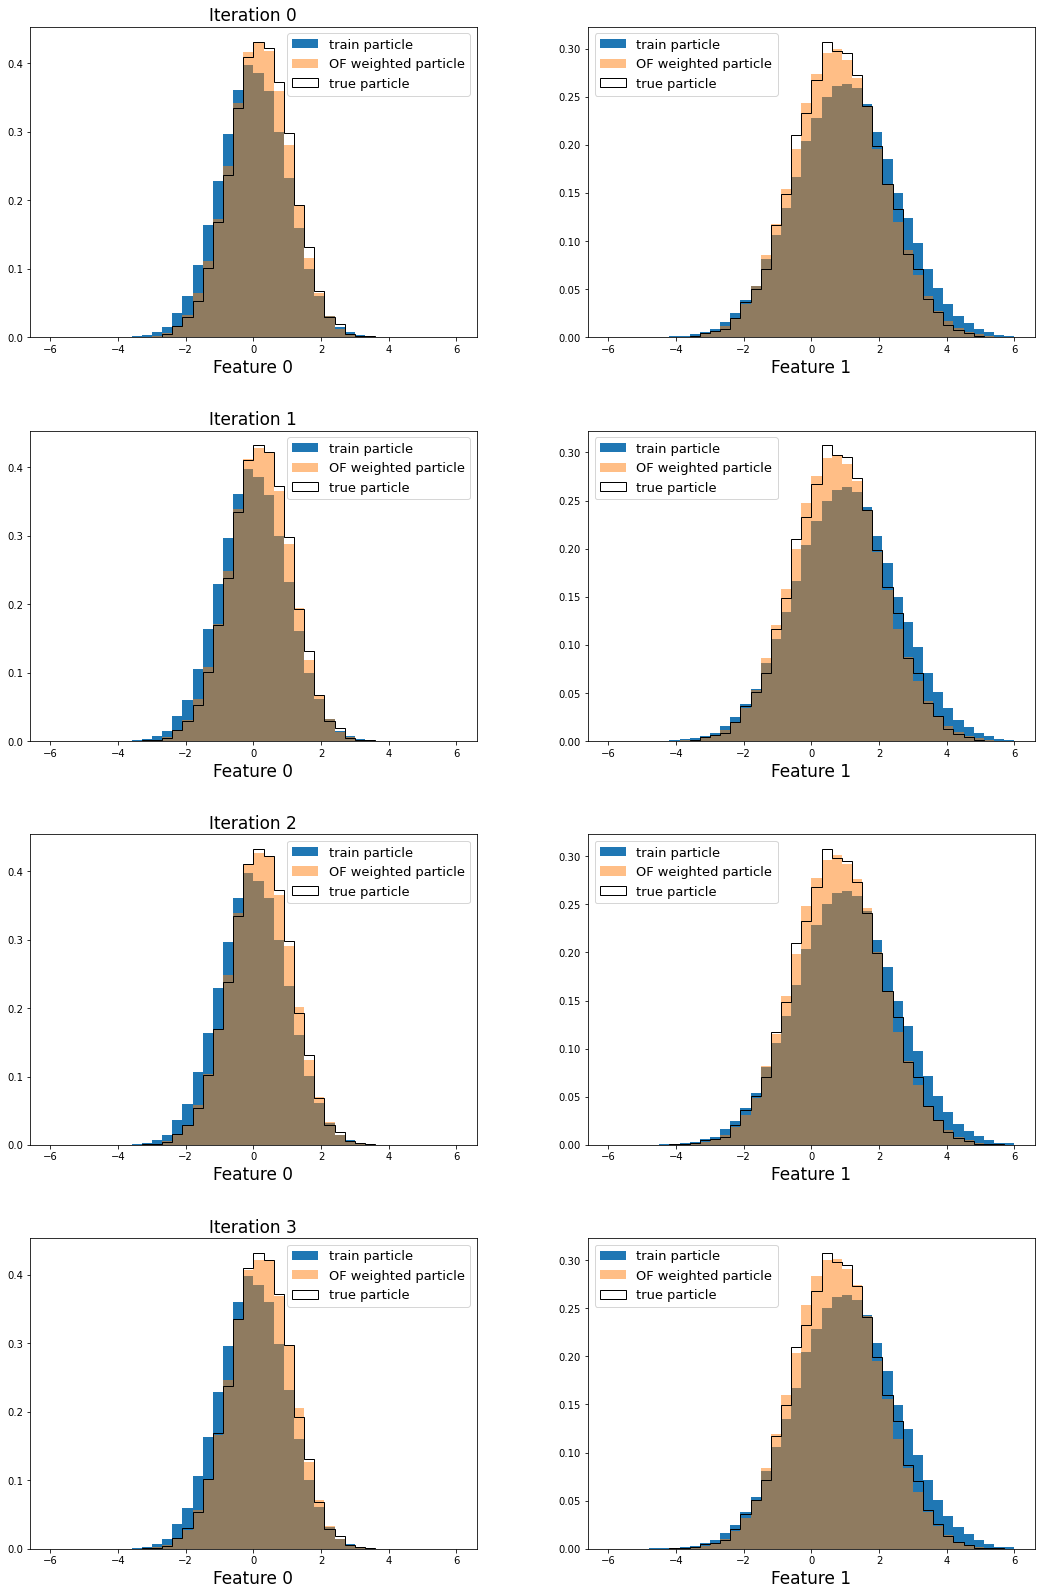

In [19]:


fig,ax = plt.subplots( of_niter, 2, figsize=(18,7*of_niter))

hmin=-6
hmax=6
hbins=40

lfontsize = 17

plt.subplots_adjust( hspace=0.30)
plt.subplots_adjust( wspace=0.25)



for ofi in range(0,of_niter) :

    ax[ofi][0].hist( train_pts[:,0], bins=hbins, range=[hmin,hmax], density=True, label='train particle' )
    ax[ofi][0].hist( train_pts[:,0], weights=of_weights[ofi,1,:], bins=hbins, range=[hmin,hmax], density=True, label='OF weighted particle', alpha=0.5 )
    ax[ofi][0].hist( true_pts[:,0], bins=hbins, range=[hmin,hmax], density=True, label='true particle', histtype='step', color='black' )

    ax[ofi][1].hist( train_pts[:,1], bins=hbins, range=[hmin,hmax], density=True, label='train particle' )
    ax[ofi][1].hist( train_pts[:,1], weights=of_weights[ofi,1,:], bins=hbins, range=[hmin,hmax], density=True, label='OF weighted particle', alpha=0.5 )
    ax[ofi][1].hist( true_pts[:,1], bins=hbins, range=[hmin,hmax], density=True, label='true particle', histtype='step', color='black' )


    ax[ofi][0].legend(loc='best', fontsize=13)
    ax[ofi][1].legend(loc='best', fontsize=13)
    
    
    ax[ofi][0].set_xlabel('Feature 0', fontsize=lfontsize )
    
    ax[ofi][1].set_xlabel('Feature 1', fontsize=lfontsize )
    
    ax[ofi][0].set_title('Iteration %d' % ofi, fontsize=lfontsize )



plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

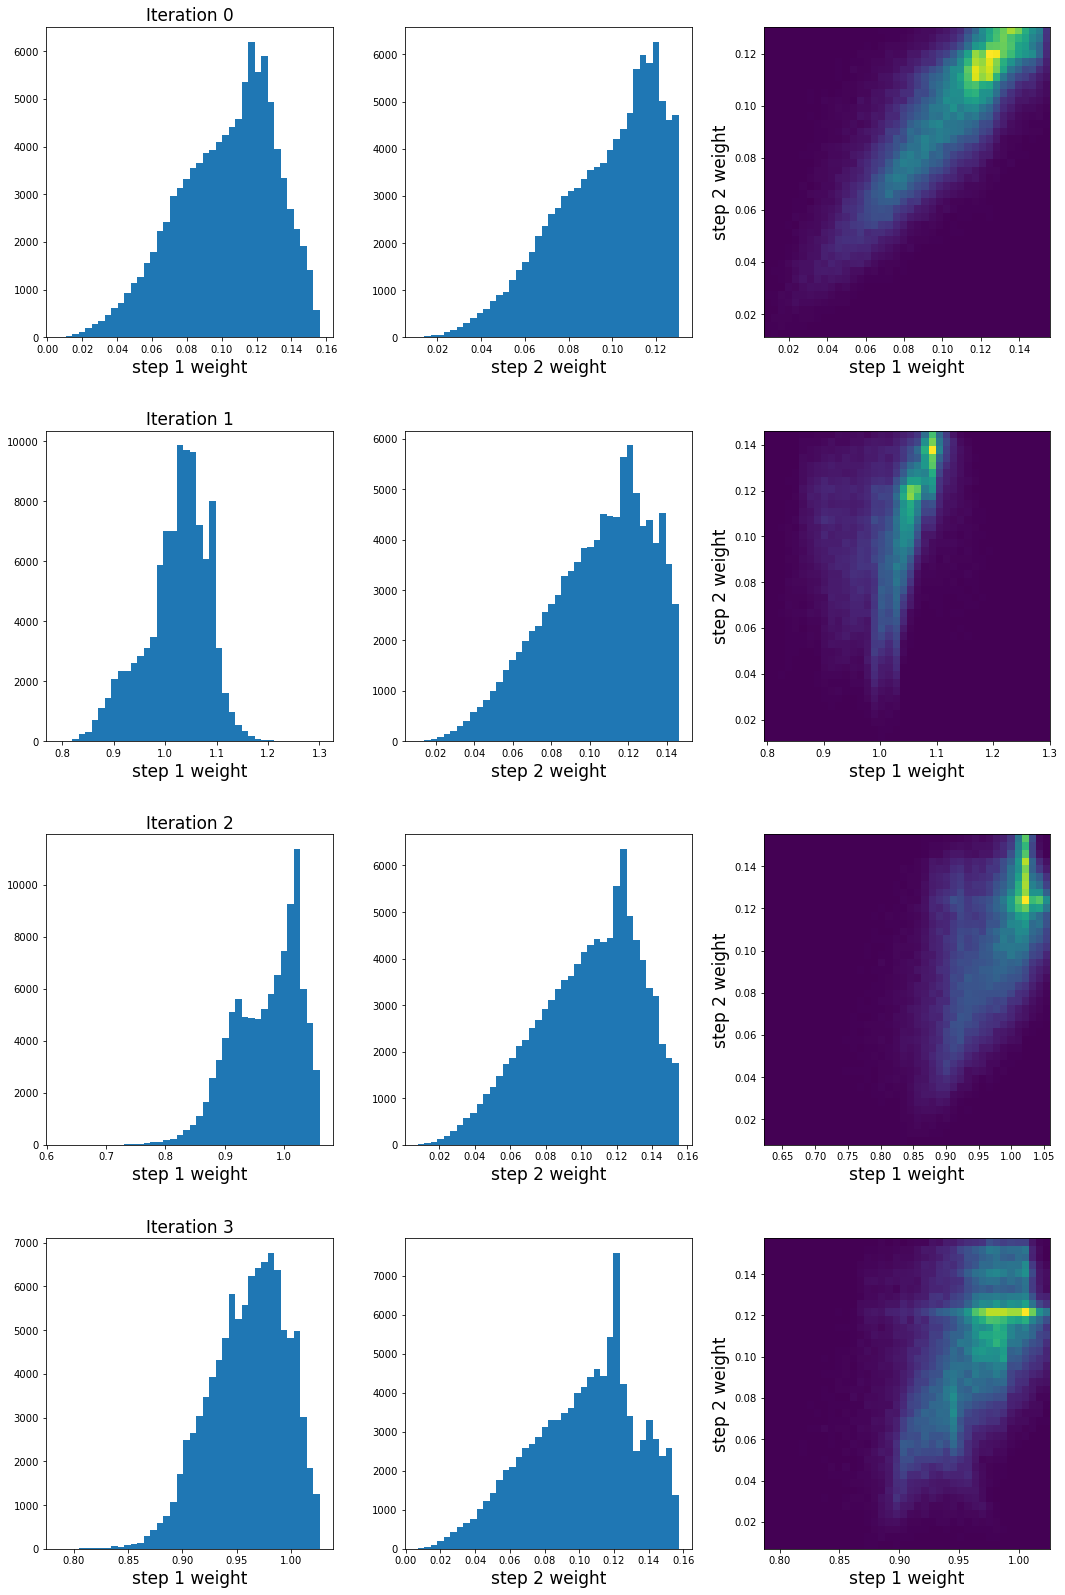

In [20]:
fig,ax = plt.subplots( of_niter, 3, figsize=(18,7*of_niter))

hmin=-6
hmax=6
hbins=40

lfontsize = 17

plt.subplots_adjust( hspace=0.30)
plt.subplots_adjust( wspace=0.25)

for ofi in range(0,of_niter) :

    ax[ofi][0].hist( of_weights[ofi,0,:], bins=hbins )
    ax[ofi][1].hist( of_weights[ofi,1,:], bins=hbins )
    ax[ofi][2].hist2d( of_weights[ofi,0,:], of_weights[ofi,1,:], bins=[hbins,hbins] )
    
    ax[ofi][0].set_xlabel( 'step 1 weight', fontsize=lfontsize )
    
    ax[ofi][1].set_xlabel( 'step 2 weight', fontsize=lfontsize )
    
    ax[ofi][2].set_xlabel( 'step 1 weight', fontsize=lfontsize )
    ax[ofi][2].set_ylabel( 'step 2 weight', fontsize=lfontsize )
    
    ax[ofi][0].set_title('Iteration %d' % ofi, fontsize=lfontsize )
    
    
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

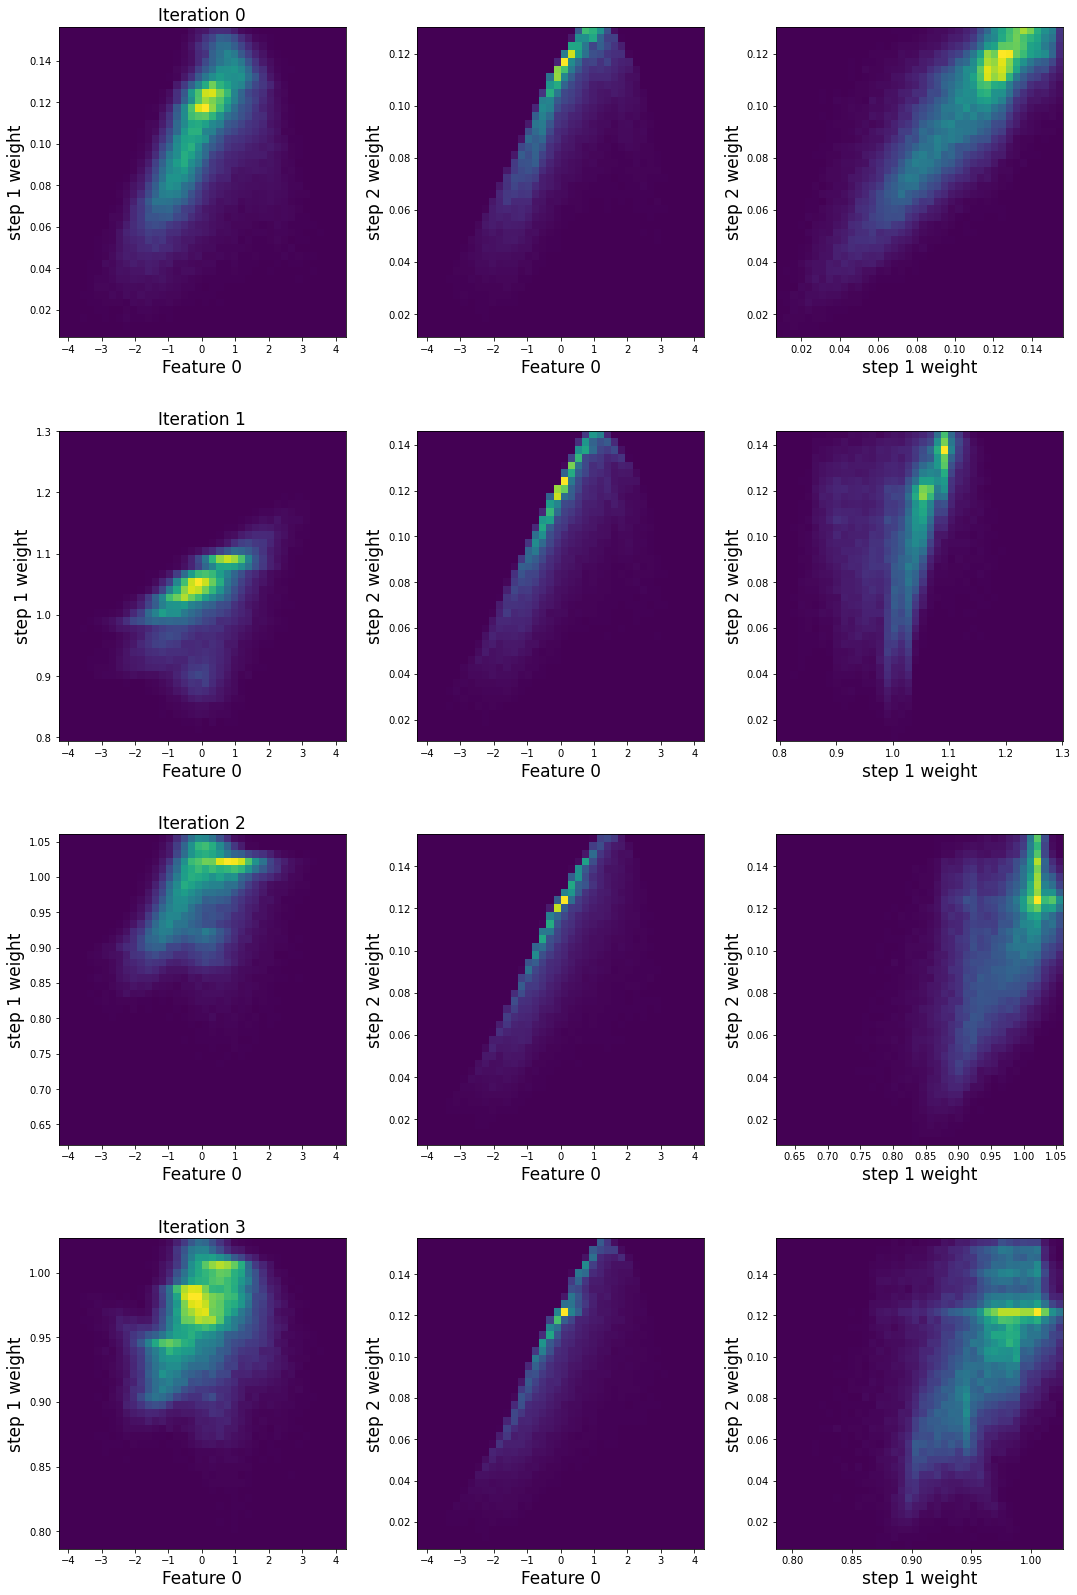

In [21]:
fig,ax = plt.subplots( of_niter, 3, figsize=(18,7*of_niter))

hmin=-6
hmax=6
hbins=40

lfontsize = 17

plt.subplots_adjust( hspace=0.30)
plt.subplots_adjust( wspace=0.25)

for ofi in range(0,of_niter) :

    ax[ofi][0].hist2d( train_pts[:,0], of_weights[ofi,0,:], bins=[hbins,hbins] )
    ax[ofi][1].hist2d( train_pts[:,0], of_weights[ofi,1,:], bins=[hbins,hbins] )
    ax[ofi][2].hist2d( of_weights[ofi,0,:], of_weights[ofi,1,:], bins=[hbins,hbins] )
    
    ax[ofi][0].set_xlabel( 'Feature 0', fontsize=lfontsize )
    ax[ofi][0].set_ylabel( 'step 1 weight', fontsize=lfontsize )
    
    ax[ofi][1].set_xlabel( 'Feature 0', fontsize=lfontsize )
    ax[ofi][1].set_ylabel( 'step 2 weight', fontsize=lfontsize )
    
    ax[ofi][2].set_xlabel( 'step 1 weight', fontsize=lfontsize )
    ax[ofi][2].set_ylabel( 'step 2 weight', fontsize=lfontsize )
    
    ax[ofi][0].set_title('Iteration %d' % ofi, fontsize=lfontsize )
    
    
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

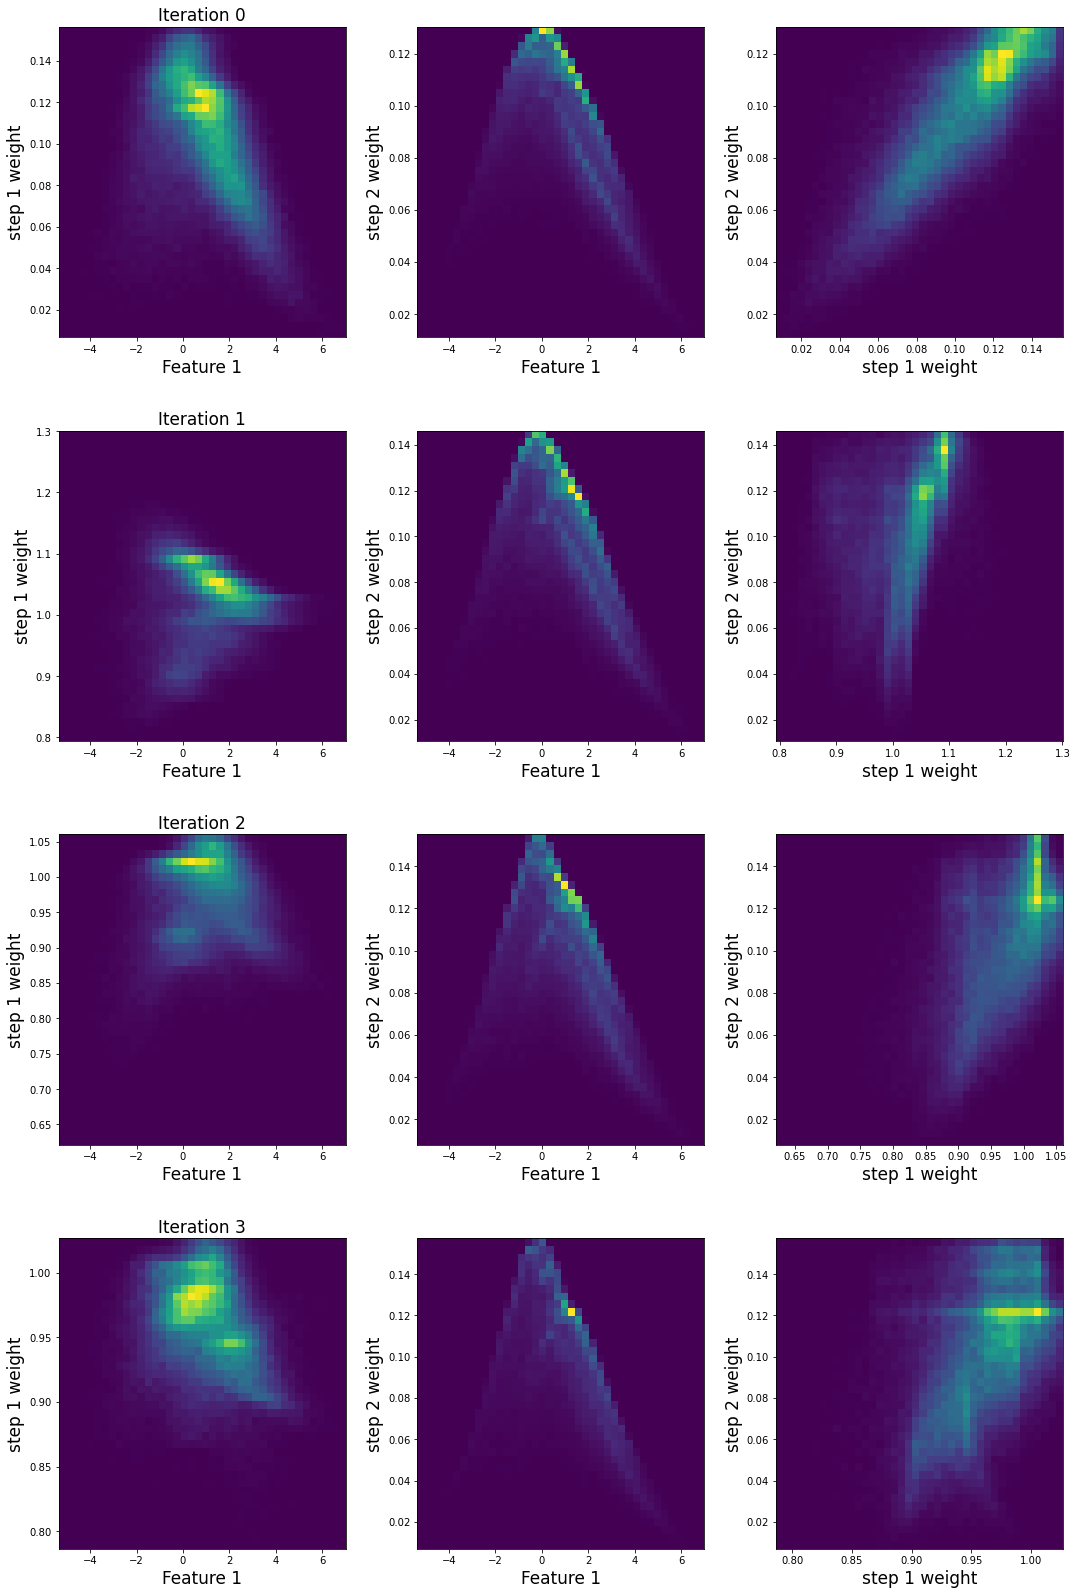

In [22]:
fig,ax = plt.subplots( of_niter, 3, figsize=(18,7*of_niter))

hmin=-6
hmax=6
hbins=40

lfontsize = 17

plt.subplots_adjust( hspace=0.30)
plt.subplots_adjust( wspace=0.25)

for ofi in range(0,of_niter) :

    ax[ofi][0].hist2d( train_pts[:,1], of_weights[ofi,0,:], bins=[hbins,hbins] )
    ax[ofi][1].hist2d( train_pts[:,1], of_weights[ofi,1,:], bins=[hbins,hbins] )
    ax[ofi][2].hist2d( of_weights[ofi,0,:], of_weights[ofi,1,:], bins=[hbins,hbins] )
    
    ax[ofi][0].set_xlabel( 'Feature 1', fontsize=lfontsize )
    ax[ofi][0].set_ylabel( 'step 1 weight', fontsize=lfontsize )
    
    ax[ofi][1].set_xlabel( 'Feature 1', fontsize=lfontsize )
    ax[ofi][1].set_ylabel( 'step 2 weight', fontsize=lfontsize )
    
    ax[ofi][2].set_xlabel( 'step 1 weight', fontsize=lfontsize )
    ax[ofi][2].set_ylabel( 'step 2 weight', fontsize=lfontsize )
    
    ax[ofi][0].set_title('Iteration %d' % ofi, fontsize=lfontsize )
    
    
plt.show

In [23]:
max_step2_weight = np.max( of_weights[3,1,:] )

<function matplotlib.pyplot.show(close=None, block=None)>

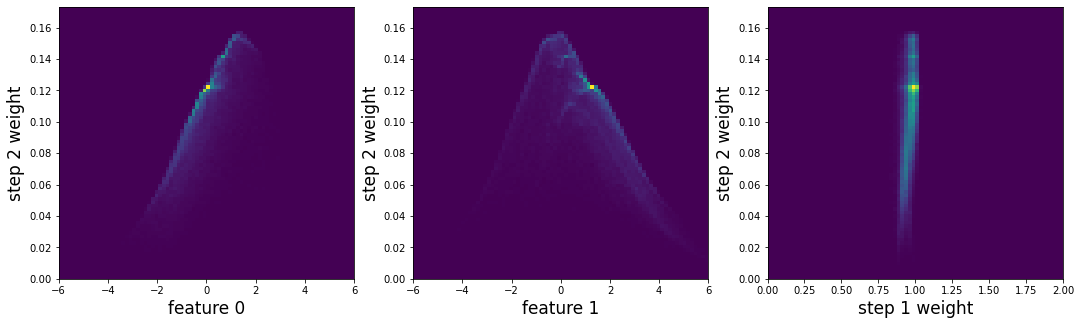

In [24]:
fig,ax = plt.subplots( 1, 3, figsize=(18,5))

hmin=-6
hmax=6
hbins=80

ax[0].hist2d( train_pts[:,0], of_weights[3,1,:], bins=[hbins,hbins], range=([hmin,hmax],[0.,1.1*max_step2_weight]))

ax[1].hist2d( train_pts[:,1], of_weights[3,1,:], bins=[hbins,hbins], range=([hmin,hmax],[0.,1.1*max_step2_weight]))

ax[2].hist2d( of_weights[3,0,:], of_weights[3,1,:], bins=[hbins,hbins], range=([0.,2.],[0.,1.1*max_step2_weight]))


lfontsize = 17

ax[0].set_xlabel( 'feature 0', fontsize=lfontsize )
ax[0].set_ylabel( 'step 2 weight', fontsize=lfontsize )


ax[1].set_xlabel( 'feature 1', fontsize=lfontsize )
ax[1].set_ylabel( 'step 2 weight', fontsize=lfontsize )

ax[2].set_xlabel( 'step 1 weight', fontsize=lfontsize )
ax[2].set_ylabel( 'step 2 weight', fontsize=lfontsize )


plt.show


## Do the bootstrap samples in a loop

In [25]:
n_boot_samples = 250

do_bootstrap = True

verbose = False

bootstrap_weights = np.zeros( shape=(n_boot_samples, len(train_pts) ))

In [26]:
%%time

rng = np.random.default_rng()

for bi in range(0,n_boot_samples) :
    
    if do_bootstrap :
        print("\n Creating bootstrap sample %3d" % bi )
        #boot_true_det_pts = np.random.Generator.choice( true_det_pts, size=len(true_det_pts) )
        boot_true_det_pts = rng.choice( true_det_pts, size=len(true_det_pts) )
        
    else :
        print("\n Creating toy sample %3d" % bi )
        boot_true_pts = np.random.multivariate_normal(true_mu, true_cov, size=ngen_true)
        boot_true_det_pts = np.random.normal( boot_true_pts, [res0, res1])
        
    boot_of_weights = of.omnifold( train_both, boot_true_det_pts, of_niter, model, verbose)
    
    bootstrap_weights[bi] = boot_of_weights[3,1,:]
    


 Creating bootstrap sample   0
10/10 [==============================] - 0s 731us/step

 Creating bootstrap sample   1
10/10 [==============================] - 0s 734us/step

 Creating bootstrap sample   2
10/10 [==============================] - 0s 722us/step

 Creating bootstrap sample   3
10/10 [==============================] - 0s 696us/step

 Creating bootstrap sample   4
10/10 [==============================] - 0s 717us/step

 Creating bootstrap sample   5
10/10 [==============================] - 0s 744us/step

 Creating bootstrap sample   6
10/10 [==============================] - 0s 685us/step

 Creating bootstrap sample   7
10/10 [==============================] - 0s 688us/step

 Creating bootstrap sample   8
10/10 [==============================] - 0s 654us/step

 Creating bootstrap sample   9
10/10 [==============================] - 0s 719us/step

 Creating bootstrap sample  10
10/10 [==============================] - 0s 702us/step

 Creating bootstrap sample  11
10/10 [====

10/10 [==============================] - 0s 699us/step

 Creating bootstrap sample  12
10/10 [==============================] - 0s 703us/step

 Creating bootstrap sample  13
10/10 [==============================] - 0s 700us/step

 Creating bootstrap sample  14
10/10 [==============================] - 0s 727us/step

 Creating bootstrap sample  15
10/10 [==============================] - 0s 693us/step

 Creating bootstrap sample  16
10/10 [==============================] - 0s 706us/step

 Creating bootstrap sample  17
10/10 [==============================] - 0s 770us/step

 Creating bootstrap sample  18
10/10 [==============================] - 0s 758us/step

 Creating bootstrap sample  19
10/10 [==============================] - 0s 687us/step

 Creating bootstrap sample  20
10/10 [==============================] - 0s 717us/step

 Creating bootstrap sample  21
10/10 [==============================] - 0s 727us/step

 Creating bootstrap sample  22
10/10 [==============================] - 0s

10/10 [==============================] - 0s 706us/step

 Creating bootstrap sample  24
10/10 [==============================] - 0s 717us/step

 Creating bootstrap sample  25
10/10 [==============================] - 0s 698us/step

 Creating bootstrap sample  26
10/10 [==============================] - 0s 741us/step

 Creating bootstrap sample  27
10/10 [==============================] - 0s 647us/step

 Creating bootstrap sample  28
10/10 [==============================] - 0s 690us/step

 Creating bootstrap sample  29
10/10 [==============================] - 0s 766us/step

 Creating bootstrap sample  30
10/10 [==============================] - 0s 703us/step

 Creating bootstrap sample  31
10/10 [==============================] - 0s 744us/step

 Creating bootstrap sample  32
10/10 [==============================] - 0s 762us/step

 Creating bootstrap sample  33
10/10 [==============================] - 0s 655us/step

 Creating bootstrap sample  34
10/10 [==============================] - 0s

10/10 [==============================] - 0s 762us/step

 Creating bootstrap sample  36
10/10 [==============================] - 0s 658us/step

 Creating bootstrap sample  37
10/10 [==============================] - 0s 740us/step

 Creating bootstrap sample  38
10/10 [==============================] - 0s 787us/step

 Creating bootstrap sample  39
10/10 [==============================] - 0s 733us/step

 Creating bootstrap sample  40
10/10 [==============================] - 0s 732us/step

 Creating bootstrap sample  41
10/10 [==============================] - 0s 753us/step

 Creating bootstrap sample  42
10/10 [==============================] - 0s 719us/step

 Creating bootstrap sample  43
10/10 [==============================] - 0s 749us/step

 Creating bootstrap sample  44
10/10 [==============================] - 0s 699us/step

 Creating bootstrap sample  45
10/10 [==============================] - 0s 768us/step

 Creating bootstrap sample  46
10/10 [==============================] - 0s

10/10 [==============================] - 0s 737us/step

 Creating bootstrap sample  48
10/10 [==============================] - 0s 689us/step

 Creating bootstrap sample  49
10/10 [==============================] - 0s 682us/step

 Creating bootstrap sample  50
10/10 [==============================] - 0s 754us/step

 Creating bootstrap sample  51
10/10 [==============================] - 0s 718us/step

 Creating bootstrap sample  52
10/10 [==============================] - 0s 724us/step

 Creating bootstrap sample  53
10/10 [==============================] - 0s 751us/step

 Creating bootstrap sample  54
10/10 [==============================] - 0s 731us/step

 Creating bootstrap sample  55
10/10 [==============================] - 0s 725us/step

 Creating bootstrap sample  56
10/10 [==============================] - 0s 693us/step

 Creating bootstrap sample  57
10/10 [==============================] - 0s 736us/step

 Creating bootstrap sample  58
10/10 [==============================] - 0s

10/10 [==============================] - 0s 724us/step

 Creating bootstrap sample  60
10/10 [==============================] - 0s 700us/step

 Creating bootstrap sample  61
10/10 [==============================] - 0s 734us/step

 Creating bootstrap sample  62
10/10 [==============================] - 0s 728us/step

 Creating bootstrap sample  63
10/10 [==============================] - 0s 727us/step

 Creating bootstrap sample  64
10/10 [==============================] - 0s 734us/step

 Creating bootstrap sample  65
10/10 [==============================] - 0s 704us/step

 Creating bootstrap sample  66
10/10 [==============================] - 0s 728us/step

 Creating bootstrap sample  67
10/10 [==============================] - 0s 705us/step

 Creating bootstrap sample  68
10/10 [==============================] - 0s 716us/step

 Creating bootstrap sample  69
10/10 [==============================] - 0s 717us/step

 Creating bootstrap sample  70
10/10 [==============================] - 0s

10/10 [==============================] - 0s 724us/step

 Creating bootstrap sample  72
10/10 [==============================] - 0s 716us/step

 Creating bootstrap sample  73
10/10 [==============================] - 0s 734us/step

 Creating bootstrap sample  74
10/10 [==============================] - 0s 723us/step

 Creating bootstrap sample  75
10/10 [==============================] - 0s 741us/step

 Creating bootstrap sample  76
10/10 [==============================] - 0s 705us/step

 Creating bootstrap sample  77
10/10 [==============================] - 0s 727us/step

 Creating bootstrap sample  78
10/10 [==============================] - 0s 743us/step

 Creating bootstrap sample  79
10/10 [==============================] - 0s 733us/step

 Creating bootstrap sample  80
10/10 [==============================] - 0s 721us/step

 Creating bootstrap sample  81
10/10 [==============================] - 0s 680us/step

 Creating bootstrap sample  82
10/10 [==============================] - 0s

10/10 [==============================] - 0s 773us/step

 Creating bootstrap sample  83
10/10 [==============================] - 0s 660us/step

 Creating bootstrap sample  84
10/10 [==============================] - 0s 714us/step

 Creating bootstrap sample  85
10/10 [==============================] - 0s 661us/step

 Creating bootstrap sample  86
10/10 [==============================] - 0s 687us/step

 Creating bootstrap sample  87
10/10 [==============================] - 0s 654us/step

 Creating bootstrap sample  88
10/10 [==============================] - 0s 688us/step

 Creating bootstrap sample  89
10/10 [==============================] - 0s 826us/step

 Creating bootstrap sample  90
10/10 [==============================] - 0s 694us/step

 Creating bootstrap sample  91
10/10 [==============================] - 0s 725us/step

 Creating bootstrap sample  92
10/10 [==============================] - 0s 715us/step

 Creating bootstrap sample  93
10/10 [==============================] - 0s

10/10 [==============================] - 0s 743us/step

 Creating bootstrap sample  95
10/10 [==============================] - 0s 791us/step

 Creating bootstrap sample  96
10/10 [==============================] - 0s 707us/step

 Creating bootstrap sample  97
10/10 [==============================] - 0s 719us/step

 Creating bootstrap sample  98
10/10 [==============================] - 0s 689us/step

 Creating bootstrap sample  99
10/10 [==============================] - 0s 677us/step

 Creating bootstrap sample 100
10/10 [==============================] - 0s 694us/step

 Creating bootstrap sample 101
10/10 [==============================] - 0s 734us/step

 Creating bootstrap sample 102
10/10 [==============================] - 0s 678us/step

 Creating bootstrap sample 103
10/10 [==============================] - 0s 743us/step

 Creating bootstrap sample 104
10/10 [==============================] - 0s 751us/step

 Creating bootstrap sample 105
10/10 [==============================] - 0s

10/10 [==============================] - 0s 673us/step

 Creating bootstrap sample 107
10/10 [==============================] - 0s 742us/step

 Creating bootstrap sample 108
10/10 [==============================] - 0s 709us/step

 Creating bootstrap sample 109
10/10 [==============================] - 0s 783us/step

 Creating bootstrap sample 110
10/10 [==============================] - 0s 662us/step

 Creating bootstrap sample 111
10/10 [==============================] - 0s 800us/step

 Creating bootstrap sample 112
10/10 [==============================] - 0s 715us/step

 Creating bootstrap sample 113
10/10 [==============================] - 0s 707us/step

 Creating bootstrap sample 114
10/10 [==============================] - 0s 736us/step

 Creating bootstrap sample 115
10/10 [==============================] - 0s 685us/step

 Creating bootstrap sample 116
10/10 [==============================] - 0s 733us/step

 Creating bootstrap sample 117
10/10 [==============================] - 0s

10/10 [==============================] - 0s 709us/step

 Creating bootstrap sample 119
10/10 [==============================] - 0s 673us/step

 Creating bootstrap sample 120
10/10 [==============================] - 0s 744us/step

 Creating bootstrap sample 121
10/10 [==============================] - 0s 739us/step

 Creating bootstrap sample 122
10/10 [==============================] - 0s 737us/step

 Creating bootstrap sample 123
10/10 [==============================] - 0s 701us/step

 Creating bootstrap sample 124
10/10 [==============================] - 0s 715us/step

 Creating bootstrap sample 125
10/10 [==============================] - 0s 742us/step

 Creating bootstrap sample 126
10/10 [==============================] - 0s 724us/step

 Creating bootstrap sample 127
10/10 [==============================] - 0s 631us/step

 Creating bootstrap sample 128
10/10 [==============================] - 0s 680us/step

 Creating bootstrap sample 129
10/10 [==============================] - 0s

10/10 [==============================] - 0s 712us/step

 Creating bootstrap sample 131
10/10 [==============================] - 0s 732us/step

 Creating bootstrap sample 132
10/10 [==============================] - 0s 743us/step

 Creating bootstrap sample 133
10/10 [==============================] - 0s 673us/step

 Creating bootstrap sample 134
10/10 [==============================] - 0s 737us/step

 Creating bootstrap sample 135
10/10 [==============================] - 0s 695us/step

 Creating bootstrap sample 136
10/10 [==============================] - 0s 746us/step

 Creating bootstrap sample 137
10/10 [==============================] - 0s 739us/step

 Creating bootstrap sample 138
10/10 [==============================] - 0s 741us/step

 Creating bootstrap sample 139
10/10 [==============================] - 0s 680us/step

 Creating bootstrap sample 140
10/10 [==============================] - 0s 748us/step

 Creating bootstrap sample 141
10/10 [==============================] - 0s

10/10 [==============================] - 0s 762us/step

 Creating bootstrap sample 143
10/10 [==============================] - 0s 696us/step

 Creating bootstrap sample 144
10/10 [==============================] - 0s 753us/step

 Creating bootstrap sample 145
10/10 [==============================] - 0s 709us/step

 Creating bootstrap sample 146
10/10 [==============================] - 0s 726us/step

 Creating bootstrap sample 147
10/10 [==============================] - 0s 710us/step

 Creating bootstrap sample 148
10/10 [==============================] - 0s 697us/step

 Creating bootstrap sample 149
10/10 [==============================] - 0s 763us/step

 Creating bootstrap sample 150
10/10 [==============================] - 0s 751us/step

 Creating bootstrap sample 151
10/10 [==============================] - 0s 688us/step

 Creating bootstrap sample 152
10/10 [==============================] - 0s 690us/step

 Creating bootstrap sample 153
10/10 [==============================] - 0s

10/10 [==============================] - 0s 743us/step

 Creating bootstrap sample 154
10/10 [==============================] - 0s 728us/step

 Creating bootstrap sample 155
10/10 [==============================] - 0s 740us/step

 Creating bootstrap sample 156
10/10 [==============================] - 0s 641us/step

 Creating bootstrap sample 157
10/10 [==============================] - 0s 756us/step

 Creating bootstrap sample 158
10/10 [==============================] - 0s 696us/step

 Creating bootstrap sample 159
10/10 [==============================] - 0s 762us/step

 Creating bootstrap sample 160
10/10 [==============================] - 0s 776us/step

 Creating bootstrap sample 161
10/10 [==============================] - 0s 735us/step

 Creating bootstrap sample 162
10/10 [==============================] - 0s 733us/step

 Creating bootstrap sample 163
10/10 [==============================] - 0s 706us/step

 Creating bootstrap sample 164
10/10 [==============================] - 0s

10/10 [==============================] - 0s 751us/step

 Creating bootstrap sample 166
10/10 [==============================] - 0s 723us/step

 Creating bootstrap sample 167
10/10 [==============================] - 0s 698us/step

 Creating bootstrap sample 168
10/10 [==============================] - 0s 793us/step

 Creating bootstrap sample 169
10/10 [==============================] - 0s 754us/step

 Creating bootstrap sample 170
10/10 [==============================] - 0s 777us/step

 Creating bootstrap sample 171
10/10 [==============================] - 0s 705us/step

 Creating bootstrap sample 172
10/10 [==============================] - 0s 766us/step

 Creating bootstrap sample 173
10/10 [==============================] - 0s 763us/step

 Creating bootstrap sample 174
10/10 [==============================] - 0s 685us/step

 Creating bootstrap sample 175
10/10 [==============================] - 0s 660us/step

 Creating bootstrap sample 176
10/10 [==============================] - 0s

10/10 [==============================] - 0s 756us/step

 Creating bootstrap sample 178
10/10 [==============================] - 0s 712us/step

 Creating bootstrap sample 179
10/10 [==============================] - 0s 726us/step

 Creating bootstrap sample 180
10/10 [==============================] - 0s 681us/step

 Creating bootstrap sample 181
10/10 [==============================] - 0s 720us/step

 Creating bootstrap sample 182
10/10 [==============================] - 0s 647us/step

 Creating bootstrap sample 183
10/10 [==============================] - 0s 747us/step

 Creating bootstrap sample 184
10/10 [==============================] - 0s 667us/step

 Creating bootstrap sample 185
10/10 [==============================] - 0s 746us/step

 Creating bootstrap sample 186
10/10 [==============================] - 0s 704us/step

 Creating bootstrap sample 187
10/10 [==============================] - 0s 748us/step

 Creating bootstrap sample 188
10/10 [==============================] - 0s

10/10 [==============================] - 0s 747us/step

 Creating bootstrap sample 190
10/10 [==============================] - 0s 807us/step

 Creating bootstrap sample 191
10/10 [==============================] - 0s 725us/step

 Creating bootstrap sample 192
10/10 [==============================] - 0s 766us/step

 Creating bootstrap sample 193
10/10 [==============================] - 0s 720us/step

 Creating bootstrap sample 194
10/10 [==============================] - 0s 715us/step

 Creating bootstrap sample 195
10/10 [==============================] - 0s 679us/step

 Creating bootstrap sample 196
10/10 [==============================] - 0s 722us/step

 Creating bootstrap sample 197
10/10 [==============================] - 0s 693us/step

 Creating bootstrap sample 198
10/10 [==============================] - 0s 779us/step

 Creating bootstrap sample 199
10/10 [==============================] - 0s 660us/step

 Creating bootstrap sample 200
10/10 [==============================] - 0s

10/10 [==============================] - 0s 697us/step

 Creating bootstrap sample 202
10/10 [==============================] - 0s 724us/step

 Creating bootstrap sample 203
10/10 [==============================] - 0s 704us/step

 Creating bootstrap sample 204
10/10 [==============================] - 0s 714us/step

 Creating bootstrap sample 205
10/10 [==============================] - 0s 722us/step

 Creating bootstrap sample 206
10/10 [==============================] - 0s 759us/step

 Creating bootstrap sample 207
10/10 [==============================] - 0s 757us/step

 Creating bootstrap sample 208
10/10 [==============================] - 0s 661us/step

 Creating bootstrap sample 209
10/10 [==============================] - 0s 676us/step

 Creating bootstrap sample 210
10/10 [==============================] - 0s 680us/step

 Creating bootstrap sample 211
10/10 [==============================] - 0s 727us/step

 Creating bootstrap sample 212
10/10 [==============================] - 0s

10/10 [==============================] - 0s 712us/step

 Creating bootstrap sample 214
10/10 [==============================] - 0s 771us/step

 Creating bootstrap sample 215
10/10 [==============================] - 0s 756us/step

 Creating bootstrap sample 216
10/10 [==============================] - 0s 780us/step

 Creating bootstrap sample 217
10/10 [==============================] - 0s 755us/step

 Creating bootstrap sample 218
10/10 [==============================] - 0s 765us/step

 Creating bootstrap sample 219
10/10 [==============================] - 0s 821us/step

 Creating bootstrap sample 220
10/10 [==============================] - 0s 737us/step

 Creating bootstrap sample 221
10/10 [==============================] - 0s 662us/step

 Creating bootstrap sample 222
10/10 [==============================] - 0s 708us/step

 Creating bootstrap sample 223
10/10 [==============================] - 0s 727us/step

 Creating bootstrap sample 224
10/10 [==============================] - 0s

10/10 [==============================] - 0s 744us/step

 Creating bootstrap sample 225
10/10 [==============================] - 0s 752us/step

 Creating bootstrap sample 226
10/10 [==============================] - 0s 763us/step

 Creating bootstrap sample 227
10/10 [==============================] - 0s 742us/step

 Creating bootstrap sample 228
10/10 [==============================] - 0s 730us/step

 Creating bootstrap sample 229
10/10 [==============================] - 0s 786us/step

 Creating bootstrap sample 230
10/10 [==============================] - 0s 745us/step

 Creating bootstrap sample 231
10/10 [==============================] - 0s 757us/step

 Creating bootstrap sample 232
10/10 [==============================] - 0s 709us/step

 Creating bootstrap sample 233
10/10 [==============================] - 0s 752us/step

 Creating bootstrap sample 234
10/10 [==============================] - 0s 758us/step

 Creating bootstrap sample 235
10/10 [==============================] - 0s

10/10 [==============================] - 0s 739us/step

 Creating bootstrap sample 237
10/10 [==============================] - 0s 733us/step

 Creating bootstrap sample 238
10/10 [==============================] - 0s 771us/step

 Creating bootstrap sample 239
10/10 [==============================] - 0s 724us/step

 Creating bootstrap sample 240
10/10 [==============================] - 0s 728us/step

 Creating bootstrap sample 241
10/10 [==============================] - 0s 648us/step

 Creating bootstrap sample 242
10/10 [==============================] - 0s 677us/step

 Creating bootstrap sample 243
10/10 [==============================] - 0s 749us/step

 Creating bootstrap sample 244
10/10 [==============================] - 0s 710us/step

 Creating bootstrap sample 245
10/10 [==============================] - 0s 904us/step

 Creating bootstrap sample 246
10/10 [==============================] - 0s 783us/step

 Creating bootstrap sample 247
10/10 [==============================] - 0s

10/10 [==============================] - 0s 681us/step

 Creating bootstrap sample 249
10/10 [==============================] - 0s 716us/step
CPU times: user 2h 18min 53s, sys: 12min 33s, total: 2h 31min 26s
Wall time: 1h 51min 53s


In [27]:
bootstrap_weights

array([[0.09147223, 0.09674677, 0.05711236, ..., 0.10691164, 0.09487162,
        0.0368714 ],
       [0.07904539, 0.08345289, 0.06846929, ..., 0.10613452, 0.08199603,
        0.04798791],
       [0.08525082, 0.08942982, 0.05655038, ..., 0.1115398 , 0.08821649,
        0.03589341],
       ...,
       [0.09294194, 0.09632029, 0.05992501, ..., 0.10386325, 0.09617206,
        0.03352876],
       [0.10204118, 0.10384054, 0.0605385 , ..., 0.10398484, 0.10668599,
        0.0361504 ],
       [0.09212313, 0.09497242, 0.05972004, ..., 0.09947053, 0.0968509 ,
        0.04102818]])

In [28]:
of_weights[3,1,:]

array([0.0838815 , 0.0902443 , 0.05984435, ..., 0.10898584, 0.08760024,
       0.03598574])

In [29]:
bootstrap_weights[0]

array([0.09147223, 0.09674677, 0.05711236, ..., 0.10691164, 0.09487162,
       0.0368714 ])

In [30]:
np.cov( bootstrap_weights[:,0])

array(5.83440208e-05)

In [31]:
bootstrap_weights[:,100]

array([0.0567842 , 0.06981373, 0.05645263, 0.0633712 , 0.0584802 ,
       0.05952024, 0.0654735 , 0.06280684, 0.05593359, 0.05205864,
       0.05273619, 0.05431745, 0.05747151, 0.05675399, 0.04957252,
       0.06300125, 0.06040729, 0.06124367, 0.05694311, 0.05759112,
       0.06733187, 0.05940638, 0.05449538, 0.05037653, 0.05652154,
       0.06049345, 0.06016932, 0.06390205, 0.06344263, 0.06113246,
       0.05662245, 0.05976398, 0.06116069, 0.06009537, 0.05256756,
       0.06394211, 0.05872397, 0.05479939, 0.06218062, 0.05672825,
       0.06268256, 0.05943105, 0.06059826, 0.05612594, 0.05980124,
       0.05787502, 0.06423366, 0.06324781, 0.06483844, 0.05515177,
       0.05117088, 0.05999   , 0.05331322, 0.07457175, 0.05795585,
       0.06155226, 0.05536195, 0.06768512, 0.06302658, 0.05378082,
       0.06115265, 0.06333446, 0.05386838, 0.07033913, 0.06216505,
       0.06042839, 0.0704857 , 0.05219286, 0.05761518, 0.05324035,
       0.06413792, 0.06256096, 0.05742311, 0.07338022, 0.06492

<function matplotlib.pyplot.show(close=None, block=None)>

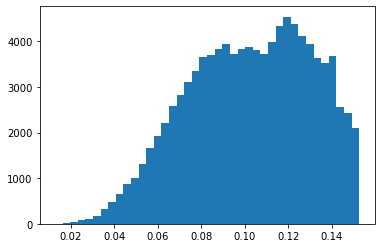

In [32]:
plt.hist( bootstrap_weights[1,:], bins=40)
plt.show

In [33]:
np.mean( bootstrap_weights, axis=0 )

array([0.08392969, 0.08901966, 0.05922343, ..., 0.10719614, 0.08706328,
       0.03455108])

In [34]:
bootstrap_w2 = bootstrap_weights * bootstrap_weights

In [35]:
bootstrap_w2

array([[0.00836717, 0.00935994, 0.00326182, ..., 0.0114301 , 0.00900062,
        0.0013595 ],
       [0.00624817, 0.00696438, 0.00468804, ..., 0.01126454, 0.00672335,
        0.00230284],
       [0.0072677 , 0.00799769, 0.00319795, ..., 0.01244113, 0.00778215,
        0.00128834],
       ...,
       [0.0086382 , 0.0092776 , 0.00359101, ..., 0.01078757, 0.00924907,
        0.00112418],
       [0.0104124 , 0.01078286, 0.00366491, ..., 0.01081285, 0.0113819 ,
        0.00130685],
       [0.00848667, 0.00901976, 0.00356648, ..., 0.00989439, 0.0093801 ,
        0.00168331]])

In [36]:
bootstrap_variance = np.mean( bootstrap_w2, axis=0 ) - np.mean( bootstrap_weights, axis=0 ) * np.mean( bootstrap_weights, axis=0 )

In [37]:
bootstrap_variance

array([5.81106447e-05, 5.72377311e-05, 1.68960749e-05, ...,
       2.34276042e-05, 5.49228964e-05, 2.82026056e-05])

In [38]:
bootstrap_rms = np.sqrt( bootstrap_variance )

In [39]:
bootstrap_rms

array([0.00762303, 0.00756556, 0.00411048, ..., 0.00484021, 0.007411  ,
       0.00531061])

In [40]:
col_vec = np.array([[11],[22],[33]])

In [41]:
col_vec

array([[11],
       [22],
       [33]])

In [42]:
row_vec = col_vec.T

In [43]:
row_vec

array([[11, 22, 33]])

In [44]:
col_times_row = col_vec * row_vec

In [45]:
col_times_row

array([[ 121,  242,  363],
       [ 242,  484,  726],
       [ 363,  726, 1089]])

In [46]:
col_vec.shape

(3, 1)

In [47]:
row_vec.shape

(1, 3)

In [48]:
col_times_row.shape

(3, 3)

In [49]:
row_times_col = row_vec * col_vec

In [50]:
row_times_col

array([[ 121,  242,  363],
       [ 242,  484,  726],
       [ 363,  726, 1089]])

In [51]:
row_times_row = row_vec * row_vec

In [52]:
row_times_row

array([[ 121,  484, 1089]])

In [53]:
#row_dot_row = np.dot(row_vec,row_vec)

In [54]:
row_dot_col = np.dot(row_vec,col_vec)

In [55]:
row_dot_col

array([[1694]])

In [56]:
row_dot_col.shape

(1, 1)

In [57]:
col_dot_row = np.dot(col_vec,row_vec)

In [58]:
col_dot_row

array([[ 121,  242,  363],
       [ 242,  484,  726],
       [ 363,  726, 1089]])

In [59]:
bootstrap_weights.shape

(250, 100000)

In [60]:
bootstrap_weights.T

array([[0.09147223, 0.07904539, 0.08525082, ..., 0.09294194, 0.10204118,
        0.09212313],
       [0.09674677, 0.08345289, 0.08942982, ..., 0.09632029, 0.10384054,
        0.09497242],
       [0.05711236, 0.06846929, 0.05655038, ..., 0.05992501, 0.0605385 ,
        0.05972004],
       ...,
       [0.10691164, 0.10613452, 0.1115398 , ..., 0.10386325, 0.10398484,
        0.09947053],
       [0.09487162, 0.08199603, 0.08821649, ..., 0.09617206, 0.10668599,
        0.0968509 ],
       [0.0368714 , 0.04798791, 0.03589341, ..., 0.03352876, 0.0361504 ,
        0.04102818]])

In [61]:
bootstrap_weights.T.shape

(100000, 250)

In [62]:
bootstrap_weights_dot = np.dot( bootstrap_weights, bootstrap_weights.T )

In [63]:
bootstrap_weights_dot

array([[1141.89865431, 1132.01324672, 1141.15043981, ..., 1098.03506235,
        1108.22529633, 1133.14717522],
       [1132.01324672, 1133.48018615, 1134.40650694, ..., 1093.28567589,
        1102.15417211, 1126.96140947],
       [1141.15043981, 1134.40650694, 1144.22388409, ..., 1099.3900763 ,
        1110.54741809, 1134.97905009],
       ...,
       [1098.03506235, 1093.28567589, 1099.3900763 , ..., 1062.83991257,
        1071.00320255, 1094.29281032],
       [1108.22529633, 1102.15417211, 1110.54741809, ..., 1071.00320255,
        1082.3415623 , 1105.70738863],
       [1133.14717522, 1126.96140947, 1134.97905009, ..., 1094.29281032,
        1105.70738863, 1134.55592653]])

In [64]:
bootstrap_weights_dot.shape

(250, 250)

In [65]:
#bootstrap_weights_dot2 = np.dot( bootstrap_weights.T, bootstrap_weights )

In [66]:
#bootstrap_weights_dot2

In [67]:
bootstrap_weights[:,0]

array([0.09147223, 0.07904539, 0.08525082, 0.07877982, 0.07911245,
       0.07811747, 0.07069138, 0.08217821, 0.07946799, 0.08968128,
       0.08309535, 0.0794525 , 0.07169063, 0.07591625, 0.07093982,
       0.0746171 , 0.08042447, 0.07850048, 0.08875777, 0.08238038,
       0.08019009, 0.08414529, 0.07666972, 0.09040055, 0.08079123,
       0.07948282, 0.07804646, 0.0844549 , 0.08124695, 0.08402832,
       0.07861755, 0.08444389, 0.07642024, 0.08375879, 0.0716571 ,
       0.0788025 , 0.08331551, 0.08539996, 0.07399134, 0.08521479,
       0.08765893, 0.08164614, 0.07766068, 0.0753831 , 0.08543984,
       0.08380124, 0.08402681, 0.07823136, 0.07818152, 0.08053876,
       0.07484971, 0.0837343 , 0.08099554, 0.07776455, 0.07160363,
       0.0809253 , 0.08000524, 0.078506  , 0.08579565, 0.06952652,
       0.07575459, 0.07583515, 0.07938672, 0.09491935, 0.09319864,
       0.0818833 , 0.0852342 , 0.08072062, 0.08407646, 0.08272529,
       0.0898414 , 0.0869493 , 0.08142293, 0.08796259, 0.08141

In [68]:
bootstrap_weights[:,1]

array([0.09674677, 0.08345289, 0.08942982, 0.0870268 , 0.08355922,
       0.08335689, 0.07677983, 0.08660221, 0.08244125, 0.09493577,
       0.09153114, 0.08272035, 0.07975918, 0.08220023, 0.07639343,
       0.08408371, 0.08410341, 0.08130469, 0.09125686, 0.08806248,
       0.08580703, 0.09023099, 0.07998972, 0.09565904, 0.08547308,
       0.08584724, 0.0804123 , 0.08979245, 0.08491901, 0.08738147,
       0.08149595, 0.08696011, 0.08256514, 0.08696261, 0.08002114,
       0.08170207, 0.08868251, 0.08736566, 0.08121129, 0.09215889,
       0.08849961, 0.08544285, 0.08527786, 0.08243311, 0.08909997,
       0.09384757, 0.08794775, 0.08124243, 0.08267981, 0.08631984,
       0.07982756, 0.08862938, 0.08498301, 0.08276304, 0.0752787 ,
       0.08521896, 0.08288775, 0.0829001 , 0.09145226, 0.07612068,
       0.08154984, 0.07916362, 0.08306142, 0.09750643, 0.0959172 ,
       0.08529154, 0.08976967, 0.0858693 , 0.08873205, 0.08866558,
       0.09319054, 0.09239563, 0.08907276, 0.09691499, 0.08440

In [69]:
combined = np.column_stack( (bootstrap_weights[:,0], bootstrap_weights[:,1]))

In [70]:
combined

array([[0.09147223, 0.09674677],
       [0.07904539, 0.08345289],
       [0.08525082, 0.08942982],
       [0.07877982, 0.0870268 ],
       [0.07911245, 0.08355922],
       [0.07811747, 0.08335689],
       [0.07069138, 0.07677983],
       [0.08217821, 0.08660221],
       [0.07946799, 0.08244125],
       [0.08968128, 0.09493577],
       [0.08309535, 0.09153114],
       [0.0794525 , 0.08272035],
       [0.07169063, 0.07975918],
       [0.07591625, 0.08220023],
       [0.07093982, 0.07639343],
       [0.0746171 , 0.08408371],
       [0.08042447, 0.08410341],
       [0.07850048, 0.08130469],
       [0.08875777, 0.09125686],
       [0.08238038, 0.08806248],
       [0.08019009, 0.08580703],
       [0.08414529, 0.09023099],
       [0.07666972, 0.07998972],
       [0.09040055, 0.09565904],
       [0.08079123, 0.08547308],
       [0.07948282, 0.08584724],
       [0.07804646, 0.0804123 ],
       [0.0844549 , 0.08979245],
       [0.08124695, 0.08491901],
       [0.08402832, 0.08738147],
       [0.

In [71]:
pair_cov = np.cov( combined )

In [72]:
pair_cov

array([[1.39103556e-05, 1.16237619e-05, 1.10211219e-05, ...,
        8.90962193e-06, 4.74541238e-06, 7.51433429e-06],
       [1.16237619e-05, 9.71304007e-06, 9.20946238e-06, ...,
        7.44505224e-06, 3.96535828e-06, 6.27912292e-06],
       [1.10211219e-05, 9.20946238e-06, 8.73199293e-06, ...,
        7.05905957e-06, 3.75977218e-06, 5.95357847e-06],
       ...,
       [8.90962193e-06, 7.44505224e-06, 7.05905957e-06, ...,
        5.70663792e-06, 3.03944998e-06, 4.81295226e-06],
       [4.74541238e-06, 3.96535828e-06, 3.75977218e-06, ...,
        3.03944998e-06, 1.61886146e-06, 2.56345818e-06],
       [7.51433429e-06, 6.27912292e-06, 5.95357847e-06, ...,
        4.81295226e-06, 2.56345818e-06, 4.05922186e-06]])

In [73]:
combined_row = np.row_stack( (bootstrap_weights[:,0], bootstrap_weights[:,2]))

In [74]:
combined_row

array([[0.09147223, 0.07904539, 0.08525082, 0.07877982, 0.07911245,
        0.07811747, 0.07069138, 0.08217821, 0.07946799, 0.08968128,
        0.08309535, 0.0794525 , 0.07169063, 0.07591625, 0.07093982,
        0.0746171 , 0.08042447, 0.07850048, 0.08875777, 0.08238038,
        0.08019009, 0.08414529, 0.07666972, 0.09040055, 0.08079123,
        0.07948282, 0.07804646, 0.0844549 , 0.08124695, 0.08402832,
        0.07861755, 0.08444389, 0.07642024, 0.08375879, 0.0716571 ,
        0.0788025 , 0.08331551, 0.08539996, 0.07399134, 0.08521479,
        0.08765893, 0.08164614, 0.07766068, 0.0753831 , 0.08543984,
        0.08380124, 0.08402681, 0.07823136, 0.07818152, 0.08053876,
        0.07484971, 0.0837343 , 0.08099554, 0.07776455, 0.07160363,
        0.0809253 , 0.08000524, 0.078506  , 0.08579565, 0.06952652,
        0.07575459, 0.07583515, 0.07938672, 0.09491935, 0.09319864,
        0.0818833 , 0.0852342 , 0.08072062, 0.08407646, 0.08272529,
        0.0898414 , 0.0869493 , 0.08142293, 0.08

In [75]:
pair_cov_rs = np.cov( combined_row )

In [76]:
pair_cov_rs

array([[5.83440208e-05, 5.57273127e-06],
       [5.57273127e-06, 1.69639306e-05]])

In [77]:
pair_cor = np.corrcoef(combined_row)

In [78]:
pair_cor

array([[1.        , 0.17713594],
       [0.17713594, 1.        ]])

In [79]:
pair_cor[0,1]

0.17713593704455938

In [80]:
ncalc = 100000
corr_array = np.zeros( ncalc )

point_index = 53

for i in range(ncalc) :
    pair_cor = np.corrcoef( np.row_stack( (bootstrap_weights[:,point_index], bootstrap_weights[:,i]) ))
    corr_array[i] = pair_cor[0,1]


In [81]:
corr_array

array([-0.26320162, -0.27948047, -0.10493867, ...,  0.07432161,
       -0.27152513, -0.07148503])

<function matplotlib.pyplot.show(close=None, block=None)>

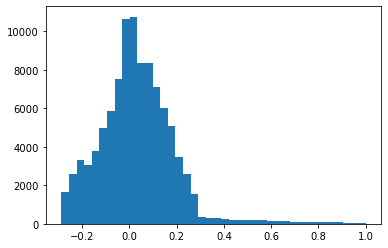

In [82]:
plt.hist( corr_array, bins=40)
plt.show

In [83]:
train_pts[point_index]

array([ 1.31344386, -3.34493934])

In [84]:
df0 = train_pts[:,0] - train_pts[point_index,0]
df1 = train_pts[:,1] - train_pts[point_index,1]
dr = np.sqrt( df0*df0 + df1*df1)

<function matplotlib.pyplot.show(close=None, block=None)>

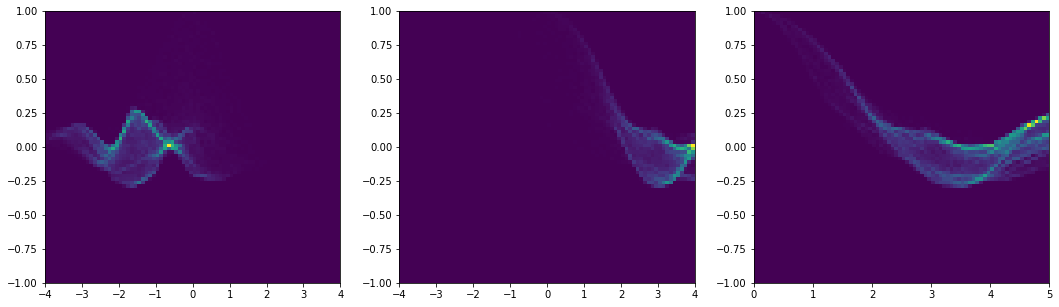

In [85]:
fig,ax = plt.subplots( 1, 3, figsize=(18,5))
ax[0].hist2d( df0, corr_array, bins=[80,80], range=([-4,4],[-1,1]))
ax[1].hist2d( df1, corr_array, bins=[80,80], range=([-4,4],[-1,1]))
ax[2].hist2d( dr, corr_array, bins=[80,80], range=([0,5],[-1,1]))
plt.show

In [86]:
output_filebase = 'bootstrap-output-test1d'

In [87]:
with open( '%s.npy' % output_filebase, 'wb') as f :
    np.save(f, train_pts)
    np.save(f, train_det_pts)
    np.save(f, true_pts)
    np.save(f, true_det_pts)
    np.save(f, bootstrap_weights)
    

In [88]:
train_pts.shape

(100000, 2)

In [89]:
train_det_pts

array([[-0.46085852, -0.29466551],
       [-0.21547956,  0.60374125],
       [-1.28168517,  3.34982408],
       ...,
       [-0.23417412,  1.37876022],
       [-0.50797514, -1.15363073],
       [-1.18724321,  3.99953876]])

In [90]:
true_det_pts

array([[ 0.48208556,  2.00422502],
       [-0.83556729,  0.8040183 ],
       [ 2.58089915, -0.18277317],
       ...,
       [ 1.76704039, -2.54921182],
       [-0.03321437,  1.06230218],
       [-2.04071246,  1.93627228]])

In [91]:
true_det_pts.shape

(10000, 2)

In [92]:
bootstrap_weights

array([[0.09147223, 0.09674677, 0.05711236, ..., 0.10691164, 0.09487162,
        0.0368714 ],
       [0.07904539, 0.08345289, 0.06846929, ..., 0.10613452, 0.08199603,
        0.04798791],
       [0.08525082, 0.08942982, 0.05655038, ..., 0.1115398 , 0.08821649,
        0.03589341],
       ...,
       [0.09294194, 0.09632029, 0.05992501, ..., 0.10386325, 0.09617206,
        0.03352876],
       [0.10204118, 0.10384054, 0.0605385 , ..., 0.10398484, 0.10668599,
        0.0361504 ],
       [0.09212313, 0.09497242, 0.05972004, ..., 0.09947053, 0.0968509 ,
        0.04102818]])

In [93]:
bootstrap_weights.shape

(250, 100000)